## 인공신경망

  - \*\*`인공신경망(Artificial Neural Network, ANN)`\*\*은 인간의 뇌 구조를 모방하여, 스마트폰 사진 검색이나 스팸 메일 필터링과 같은 복잡한 문제를 해결하는 강력한 분석 모델임.
  - 기존 분석 모델은 단순한 패턴 분석에 강점이 있었지만, 인공신경망은 이미지, 음성, 텍스트와 같은 **비정형 데이터** 속에서 여러 처리 단계를 거쳐 스스로 특징을 학습하고 의미를 찾아냄.

## 2. 핵심 원리 파헤치기 (Deep Dive)

### 인공지능의 역사와 딥러닝의 등장

  - **`인공지능(AI)`** 이론은 과거부터 존재했으나, 컴퓨터 성능과 데이터 부족으로 구현에 한계가 있었음.
  - 2010년을 전후하여 세 가지 혁신이 **`딥러닝`** 시대를 열었음.
    1.  **혁신적 알고리즘**: 제프리 힌튼 교수가 제안한 **`딥러닝`** 이론이 압도적인 성능을 증명함.
    2.  **컴퓨팅 파워 발전**: GPU 등 하드웨어의 발전으로 대규모 연산이 가능해짐.
    3.  **데이터 폭증**: 인터넷과 스마트 기기 보급으로 학습 데이터가 폭발적으로 증가함.

### 생물학적 뉴런 vs. 인공 뉴런

  - 인공신경망은 생물학적 \*\*`신경망(Neural Network)`\*\*의 기본 단위인 \*\*`뉴런(Neuron)`\*\*에서 영감을 얻음.

  - **생물학적 뉴런**: '수상돌기'로 입력 신호를 받아 '신경세포체'에서 처리한 뒤, '축삭돌기'를 통해 다음 뉴런으로 출력 신호를 전달함.

  - **인공 뉴런 (수학적 모방)**

      - **`입력(x)`**: 데이터의 각 특징(feature).
      - **`가중치(w)`**: 각 입력 신호의 중요도. 모델 학습은 최적의 가중치를 찾는 과정임.
      - **`합산(Σ)`**: 모든 입력 신호와 가중치의 곱을 더함.
      - **`활성화 함수(f)`**: 합산된 값을 특정 형태로 변환하여 출력하는 함수. 신경망이 복잡한 **비선형 패턴**을 학습할 수 있게 함.

### 활성화 함수 (Activation Function)

  - 뉴런의 최종 출력 신호를 결정하는 중요한 함수.
  - **`시그모이드(Sigmoid)`**: 출력을 0과 1 사이 값으로 압축하여 확률처럼 해석하게 함.
  - **`렐루(ReLU)`**: 입력이 0보다 크면 값을 그대로 출력하고, 아니면 0을 출력. 계산이 빠르고 성능이 좋아 널리 사용됨.
  - **`소프트맥스(Softmax)`**: 여러 출력 값의 총합이 1이 되도록 정규화. 다중 클래스 분류 문제의 출력층에서 각 클래스에 속할 확률을 계산하는 데 사용됨.

### 인공신경망의 전체 구조

  - 인공 뉴런(또는 **`퍼셉트론`**)들이 모여 네트워크를 형성하며, 크게 세 종류의 \*\*층(`Layer`)\*\*으로 구성됨.

<!-- end list -->

1.  **입력층 (Input Layer)**: 데이터가 처음 들어오는 층.
2.  **은닉층 (Hidden Layer)**: 입력층과 출력층 사이에서 복잡한 패턴을 학습하는 핵심적인 층. 은닉층이 2개 이상이면 **`다층 퍼셉트론(MLP)`**, 매우 깊으면 **`심층 신경망(DNN)`** 또는 \*\*`딥러닝`\*\*이라 부름.
3.  **출력층 (Output Layer)**: 모델의 최종 예측 결과를 출력하는 층.

<!-- end list -->

  - **학습 과정**: `입력 -> 은닉층 -> 출력` 순서로 예측값을 계산하고, 실제 값과의 \*\*`오차(Error)`\*\*를 최소화하는 방향으로 \*\*`역전파(Backpropagation)`\*\*를 통해 \*\*`가중치(w)`\*\*를 업데이트하는 과정을 반복함.

## 3. 실전 코드 분석 및 적용 (Code Walkthrough & Application)

### `MLPClassifier` 소개

  - Scikit-learn에서 제공하는 다층 퍼셉트론 분류기.
  - **`hidden_layer_sizes=(100,)`**: 은닉층의 구조를 튜플로 지정 (예: `(50, 30)`은 2개의 은닉층에 각각 50개, 30개의 뉴런 설정).
  - **`activation='relu'`**: 은닉층의 활성화 함수 지정.
  - **`solver='adam'`**: 가중치 최적화 알고리즘. 'adam'이 보편적으로 사용됨.
  - **`alpha=0.0001`**: L2 정규화(과적합 방지)의 강도.
  - **`max_iter=200`**: 최대 학습 반복 횟수(epoch).
  - **`early_stopping=False`**: 검증 성능이 개선되지 않으면 학습을 조기 종료하는 기능. 과적합 방지에 유용함.

### 예제 1: 붓꽃(Iris) 데이터 분류

In [1]:
# 1. 데이터 로드 및 분할
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 데이터 로드
iris = load_iris()
iris_X = iris.data
iris_y = iris.target

# 훈련 데이터와 테스트 데이터 분할 (7:3)
train_X, test_X, train_y, test_y = \
    train_test_split(iris_X, iris_y, test_size=0.3, random_state=1)

In [2]:
# 2. 인공신경망 모델 생성 및 학습
from sklearn.neural_network import MLPClassifier

# 은닉층 3개 (뉴런 50개, 50개, 30개), 최대 500번 반복 학습
mlp = MLPClassifier(hidden_layer_sizes=(50, 50, 30), max_iter=500)

# 모델 학습
mlp.fit(train_X, train_y)

# 3. 모델 예측 및 평가
import pandas as pd

# 테스트 데이터로 예측
pred = mlp.predict(test_X)

# 교차분류표(혼동 행렬)로 결과 확인
print("--- 교차분류표 ---")
print(pd.crosstab(test_y, pred))

# 정확도 평가
print("\n--- 정확도 ---")
print(mlp.score(test_X, test_y))

--- 교차분류표 ---
col_0   0   1   2
row_0            
0      14   0   0
1       0  18   0
2       0   0  13

--- 정확도 ---
1.0


##### 코드 해설

### 예제 2: 다양한 데이터 분포 시각화

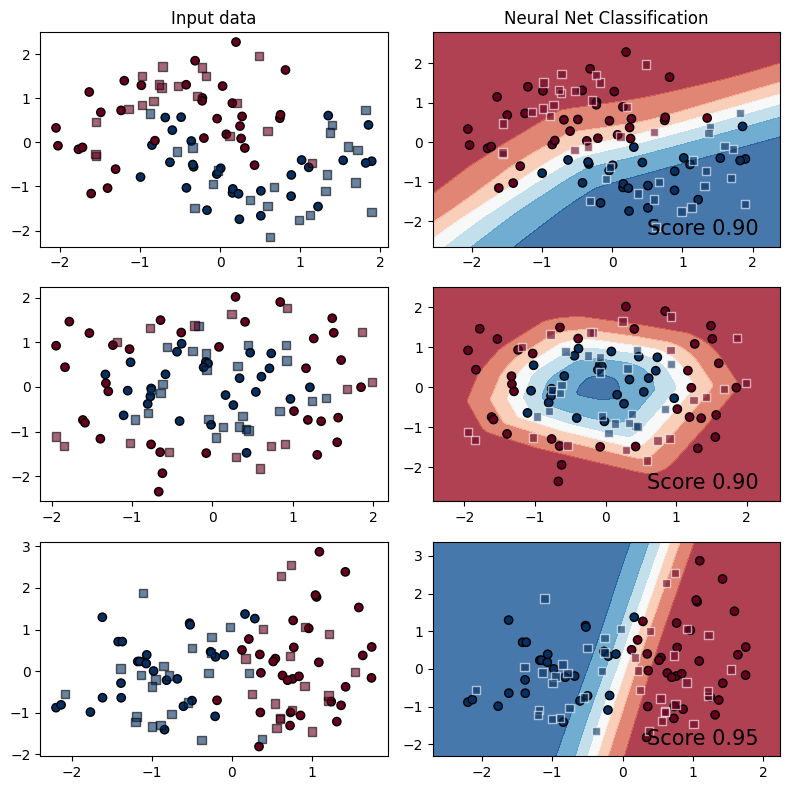

In [3]:
# 기본 패키지 임포트
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# 1. 시각화를 위한 3가지 종류의 데이터셋 생성
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

datasets = [make_moons(noise=0.3, random_state=0), # 반달 모양
            make_circles(noise=0.2, factor=0.5, random_state=1), # 원 모양
            (X, y) # 선형 모양
           ]

# 그래프 영역 초기화
figure = plt.figure(figsize=(8, 8))

# 2. 각 데이터셋에 대해 반복하며 모델 학습 및 시각화
for ds_cnt, ds in enumerate(datasets):
    # 데이터셋을 학습/검증 데이터로 분할
    X, y = ds
    X = StandardScaler().fit_transform(X) # 데이터 표준화
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=.4, random_state=42)

    # 그래프 위치 설정
    ax = plt.subplot(len(datasets), 2, 2*ds_cnt+1)
    if ds_cnt == 0:
        ax.set_title("Input data")

    # 원본 학습/검증 데이터 산점도
    ax.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap=plt.cm.RdBu, edgecolors='k')
    ax.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap=plt.cm.RdBu, alpha=0.6, edgecolors='k', marker='s')

    # 분류 모델 생성 및 학습
    ax = plt.subplot(len(datasets), 2, 2*ds_cnt+2)
    model = MLPClassifier(alpha=1, max_iter=1000)
    model.fit(train_X, train_y)
    score = model.score(test_X, test_y)

    # 결정 경계(decision boundary) 시각화
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)

    # 모델 예측 결과 산점도
    ax.scatter(train_X[:, 0], train_X[:, 1], c=model.predict(train_X), cmap=plt.cm.RdBu, edgecolors='k')
    ax.scatter(test_X[:, 0], test_X[:, 1], c=model.predict(test_X), cmap=plt.cm.RdBu, alpha=0.6, edgecolors='w', marker='s')

    if ds_cnt == 0:
        ax.set_title("Neural Net Classification")
    ax.text(xx.max() - .3, yy.min() + .3, ('Score %.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')

plt.tight_layout()
plt.show()

##### 코드 해설

## 4. 핵심 요약 (Key Takeaways)